## EDA 

Aca la idea es explorar todas las tablas, primero como fase de validacion con respecto a su esquema de datos y luego relacion y distribución de variables

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pokemon = pd.read_csv("data/silver/pokemon.csv")
stats = pd.read_csv("data/silver/pokemon_stats.csv")
types = pd.read_csv("data/silver/pokemon_types.csv")
moves = pd.read_csv("data/silver/moves.csv")
pokemon_moves = pd.read_csv("data/silver/pokemon_moves.csv")
type_eff = pd.read_csv("data/silver/type_effectiveness.csv")

In [2]:
print("=== pokemon.info ===")
pokemon.info()
print("\n=== stats.info ===")
stats.info()
print("\n=== types.info ===")
types.info()
print("\n=== pokemon_moves.info ===")
pokemon_moves.info()
print("\n=== moves.info ===")
moves.info()
print("\n=== type_eff.info ===")
type_eff.info()


=== pokemon.info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1328 non-null   int64  
 1   name              1328 non-null   object 
 2   height            1328 non-null   int64  
 3   weight            1328 non-null   int64  
 4   base_experience   1302 non-null   float64
 5   total_base_stats  1328 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 62.4+ KB

=== stats.info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7968 entries, 0 to 7967
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pokemon_id  7968 non-null   int64 
 1   stat_name   7968 non-null   object
 2   stat_value  7968 non-null   int64 
 3   effort      7968 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 249.1+ KB

=== types.info 

In [3]:
print("¿id único en pokemon? ->", pokemon["id"].is_unique)
print("¿id único en moves?   ->", moves["id"].is_unique)

# Combinación attacking_type + defending_type debería ser única
print(
    "¿attacking_type/defending_type únicos en type_effectiveness? ->",
    not type_eff.duplicated(subset=["attacking_type", "defending_type"]).any()
)

¿id único en pokemon? -> True
¿id único en moves?   -> True
¿attacking_type/defending_type únicos en type_effectiveness? -> True


In [4]:
# pokemon_stats
invalid_stats = stats[~stats["pokemon_id"].isin(pokemon["id"])]
print("Registros en pokemon_stats con pokemon_id inválido:", len(invalid_stats))

# pokemon_types
invalid_types = types[~types["pokemon_id"].isin(pokemon["id"])]
print("Registros en pokemon_types con pokemon_id inválido:", len(invalid_types))

# pokemon_moves: FK a pokemon
invalid_pm_poke = pokemon_moves[~pokemon_moves["pokemon_id"].isin(pokemon["id"])]
print("Registros en pokemon_moves con pokemon_id inválido:", len(invalid_pm_poke))

# pokemon_moves: FK a moves
invalid_pm_moves = pokemon_moves[~pokemon_moves["move_id"].isin(moves["id"])]
print("Registros en pokemon_moves con move_id inválido:", len(invalid_pm_moves))

Registros en pokemon_stats con pokemon_id inválido: 0
Registros en pokemon_types con pokemon_id inválido: 0
Registros en pokemon_moves con pokemon_id inválido: 0
Registros en pokemon_moves con move_id inválido: 0


In [6]:
pokemon.describe()

,id,height,weight,base_experience,total_base_stats
count,1328.000000,1328.000000,1328.000000,1302.000000,1328.000000
mean,2712.259789,20.536145,986.333584,161.943932,449.283133
std,4055.074011,53.691015,1960.782650,82.532554,121.310203
min,1.000000,1.000000,0.000000,36.000000,175.000000
25%,332.750000,6.000000,90.000000,71.000000,335.750000
50%,664.500000,11.000000,325.000000,165.000000,474.000000
75%,996.250000,17.000000,850.000000,222.500000,525.750000
max,10303.000000,1000.000000,10000.000000,608.000000,1125.000000


In [7]:
# Top 10 por total_base_stats
top_stats = (
    pokemon[["id", "name", "total_base_stats", "base_experience"]]
    .sort_values("total_base_stats", ascending=False)
    .head(10)
)
top_stats

,id,name,total_base_stats,base_experience
1214,10190,eternatus-eternamax,1125,563.0
1103,10079,rayquaza-mega,780,351.0
1068,10044,mewtwo-mega-y,780,351.0
1067,10043,mewtwo-mega-x,780,351.0
1325,10301,zygarde-mega,778,NaN
1101,10077,kyogre-primal,770,347.0
1102,10078,groudon-primal,770,347.0
1181,10157,necrozma-ultra,754,339.0
492,493,arceus,720,324.0
1144,10120,zygarde-complete,708,354.0


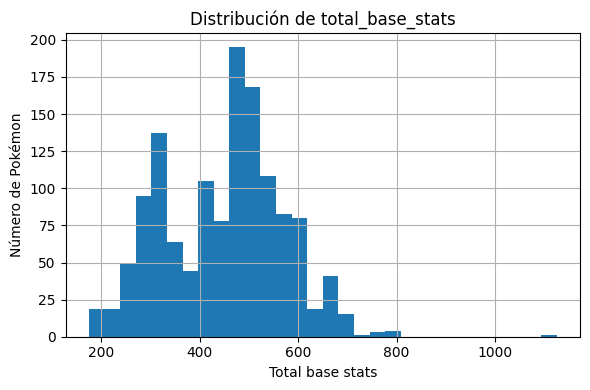

In [10]:
plt.figure(figsize=(6, 4))
pokemon["total_base_stats"].hist(bins=30)
plt.xlabel("Total base stats")
plt.ylabel("Número de Pokémon")
plt.title("Distribución de total_base_stats")
plt.tight_layout()
plt.show()

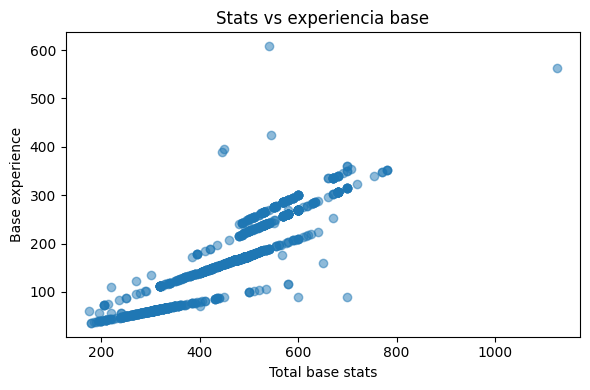

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(pokemon["total_base_stats"], pokemon["base_experience"], alpha=0.5)
plt.xlabel("Total base stats")
plt.ylabel("Base experience")
plt.title("Stats vs experiencia base")
plt.tight_layout()
plt.show()

In [16]:
types.head()

,pokemon_id,slot,type
0,1,1,grass
1,1,2,poison
2,2,1,grass
3,2,2,poison
4,3,1,grass


In [13]:
types_per_pokemon = (
    types.groupby("pokemon_id")["type"]
    .nunique()
    .rename("n_types")
    .reset_index()
)

types_per_pokemon["n_types"].value_counts()

n_types
2    749
1    579
Name: count, dtype: int64

In [15]:
type_counts = (
    types["type"]
    .value_counts()
    .rename_axis("type")
    .reset_index(name="count")
)

type_counts.head(10)

,type,count
0,water,189
1,normal,160
2,grass,155
3,flying,153
4,psychic,139
5,dragon,112
6,electric,111
7,fire,107
8,fighting,106
9,bug,105


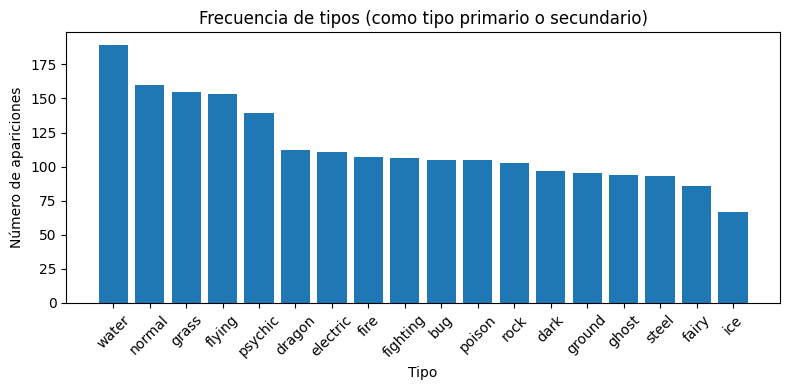

In [17]:
plt.figure(figsize=(8, 4))
plt.bar(type_counts["type"], type_counts["count"])
plt.xticks(rotation=45)
plt.xlabel("Tipo")
plt.ylabel("Número de apariciones")
plt.title("Frecuencia de tipos (como tipo primario o secundario)")
plt.tight_layout()
plt.show()

In [18]:
moves_per_pokemon = (
    pokemon_moves.groupby("pokemon_id")["move_id"]
    .nunique()
    .rename("n_moves")
    .reset_index()
)

moves_per_pokemon["n_moves"].describe()

count    1268.000000
mean       75.416404
std        24.970229
min         1.000000
25%        60.750000
50%        75.000000
75%        90.000000
max       375.000000
Name: n_moves, dtype: float64

In [19]:
# Merge con pokemon para ver extremos
pokemon_moves_count = pokemon.merge(
    moves_per_pokemon, left_on="id", right_on="pokemon_id"
)[["id", "name", "n_moves"]]

pokemon_moves_count.sort_values("n_moves", ascending=False).head(10)

,id,name,n_moves
150,151,mew,375
492,493,arceus,173
149,150,mewtwo,167
35,36,clefable,163
34,35,clefairy,161
39,40,wigglytuff,153
38,39,jigglypuff,148
474,475,gallade,145
112,113,chansey,144
241,242,blissey,137


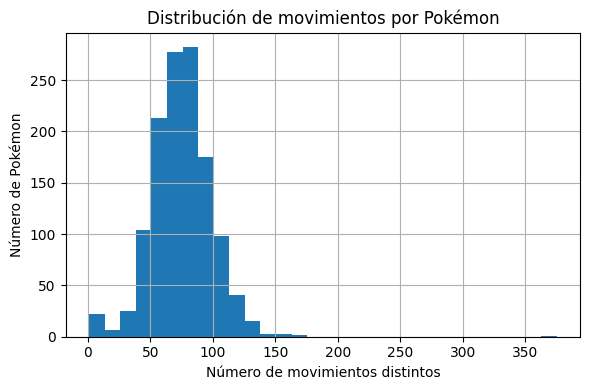

In [20]:
plt.figure(figsize=(6, 4))
moves_per_pokemon["n_moves"].hist(bins=30)
plt.xlabel("Número de movimientos distintos")
plt.ylabel("Número de Pokémon")
plt.title("Distribución de movimientos por Pokémon")
plt.tight_layout()
plt.show()

In [21]:
moves[["power", "accuracy", "pp"]].describe()

,power,accuracy,pp
count,599.000000,649.000000,919.000000
mean,77.383973,95.154083,13.390642
std,40.677697,11.545976,8.331422
min,0.000000,0.000000,1.000000
25%,50.000000,95.000000,10.000000
50%,80.000000,100.000000,10.000000
75%,100.000000,100.000000,20.000000
max,250.000000,100.000000,40.000000


In [22]:
# Top 15 movimientos con mayor power (ignorando nulos)
top_power_moves = (
    moves[moves["power"].notna()]
    .sort_values("power", ascending=False)
    .head(15)
)
top_power_moves[["id", "name", "type", "damage_class", "power", "accuracy"]]

,id,name,type,damage_class,power,accuracy
152,153,explosion,normal,physical,250.0,100.0
657,658,catastropika,electric,physical,210.0,NaN
700,701,pulverizing-pancake,normal,physical,210.0,NaN
724,725,menacing-moonraze-maelstrom,ghost,special,200.0,NaN
723,724,searing-sunraze-smash,steel,physical,200.0,NaN
119,120,self-destruct,normal,physical,200.0,100.0
722,723,light-that-burns-the-sky,psychic,special,200.0,NaN
696,697,oceanic-operetta,water,special,195.0,NaN
698,699,soul-stealing-7-star-strike,ghost,physical,195.0,NaN
718,719,10-000-000-volt-thunderbolt,electric,special,195.0,NaN


In [23]:
attacking_types = type_eff["attacking_type"].unique()
defending_types = type_eff["defending_type"].unique()

len(attacking_types), len(defending_types)

(21, 21)

In [25]:
fire_off = type_eff[type_eff["attacking_type"] == "fire"].copy()
fire_off.sort_values("multiplier", ascending=False)

,attacking_type,defending_type,multiplier
126,fire,bug,2.0
137,fire,ice,2.0
143,fire,steel,2.0
135,fire,grass,2.0
145,fire,unknown,1.0
144,fire,stellar,1.0
142,fire,shadow,1.0
140,fire,psychic,1.0
139,fire,poison,1.0
138,fire,normal,1.0


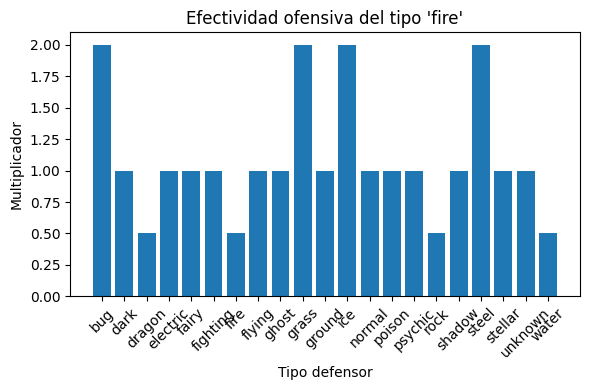

In [26]:
plt.figure(figsize=(6, 4))
plt.bar(fire_off["defending_type"], fire_off["multiplier"])
plt.xticks(rotation=45)
plt.xlabel("Tipo defensor")
plt.ylabel("Multiplicador")
plt.title("Efectividad ofensiva del tipo 'fire'")
plt.tight_layout()
plt.show()